In [1]:
import matplotlib.pyplot as plt
import cv2
import os
from collections import Counter
from paddleocr import PaddleOCR, draw_ocr
import numpy as np
from PIL import Image, ImageEnhance,ImageDraw,ImageFont
from shutil import copyfile,move


/home/cai/anaconda3/envs/py38/lib/python3.8/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):
/home/cai/anaconda3/envs/py38/lib/python3.8/site-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. 

In [ ]:
import time

current_time = time.time()
print(int(current_time))

In [46]:
# make label txt
train_subdir = "/home/cai/Downloads/PaddleOCR/writing_train_data/train"
dirs = os.listdir(train_subdir)

fo = open("rec_gt_train.txt", "w")
for file in dirs:
    label = file.split('_')[1][:-4]
    fo.write("train/" + file +'\t' + label + '\n')
fo.close()  

In [7]:
SELECT = "/home/cai/PycharmProjects/esun_writing/img0615"
DESPATH = "/home/cai/PycharmProjects/esun_writing/img_contest"
# for _dir in os.listdir(SELECT):
for file in os.listdir(SELECT):
    move(os.path.join(SELECT,file),os.path.join(DESPATH,file))

In [44]:
## split train val

import random

PATH = "/home/cai/Pictures/correct_correct"
train_subdir = "/home/cai/Pictures/train"
validation_subdir = "/home/cai/Pictures/test"
train_size = 0.8
train_counter,validation_counter = 0,0

def blur(img_original):
    
    img_original = img_original.astype(np.uint8)
    img_blur=cv2.GaussianBlur(img_original,(3,3),0)
    ret3,th3 = cv2.threshold(img_blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return th3


dirs = os.listdir(PATH)

for file in dirs:
    
        if train_counter%100==0:
            print(file)
    
        filePath = os.path.join(PATH,file)
        
        img_original = cv2.imread(filePath)
        
        image_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
        
        th3 = blur(image_gray)
        blur_file = file.split('_')[0]+'blur_'+file.split('_')[1]
        

        if random.uniform(0, 1) <= train_size:
            cv2.imwrite(os.path.join(train_subdir,file),img_original)
            cv2.imwrite(os.path.join(train_subdir,blur_file),th3)
            train_counter += 1
        else:
            cv2.imwrite(os.path.join(validation_subdir,file),img_original)
            cv2.imwrite(os.path.join(validation_subdir,blur_file),th3)
            validation_counter += 1


    
print(train_counter)
print(validation_counter)

32031_氣.jpg
47619_作.jpg
59606_駿.jpg
54883_鴻.jpg
33952_慈.jpg
42357_五.jpg
31838_子.jpg
11850_琴.jpg
67314_洋.jpg
48240_儒.jpg
9700_南.jpg
24661_塑.jpg
19524_洲.jpg
5150_凍.jpg
10822_丁.jpg
28888_妤.jpg
65611_教.jpg
5747_萬.jpg
27085_翠.jpg
49562_凍.jpg
40258_總.jpg
11288_蓮.jpg
65254_素.jpg
61193_修.jpg
8485_如.jpg
56363_廖.jpg
36000_綸.jpg
2610_儀.jpg
9375_虹.jpg
38311_艾.jpg
17673_原.jpg
11117_鈞.jpg
47097_設.jpg
19060_菱.jpg
32653_花.jpg
17251_孫.jpg
14005_群.jpg
37374_浩.jpg
28519_服.jpg
40809_臺.jpg
35479_刷.jpg
2978_秦.jpg
29511_門.jpg
20641_頂.jpg
4668_啟.jpg
63847_仕.jpg
1202_竹.jpg
38313_造.jpg
62869_徐.jpg
42155_士.jpg
65398_麒.jpg
7771_生.jpg
22284_祐.jpg
38484_霞.jpg
img1623756589_會.png
48399_覽.jpg
31236_資.jpg
37626_邦.jpg
2074_翔.jpg
19510_谷.jpg
12778_希.jpg
40633_映.jpg
41274_源.jpg
1415_亨.jpg
50024_真.jpg
35848_泰.jpg
1080_花.jpg
46831_化.jpg
35286_機.jpg
img1623760445_禾.png
22482_良.jpg
47779_詠.jpg
64613_高.jpg
35247_茂.jpg
40808_昇.jpg
6820_涵.jpg
9107_于.jpg
50269_有.jpg
58173_衛.jpg
18626_貞.jpg
img1623840120_翰.png
28327_宗.jpg
68168_資

In [13]:


PATH = "/home/cai/Pictures/correct_label"
_dic = {}
cnt = 0
for _dir in os.listdir(PATH):
    dir_len = len(os.listdir(os.path.join(PATH,_dir)))
    _dic.update({_dir :dir_len/label_dict[_dir]})
    cnt += dir_len

sorted_cnt = sorted(_dic.items(), key = lambda kv: kv[1])
print(sorted_cnt)
print(cnt)

[('團', 0.391304347826087), ('達', 0.5048543689320388), ('鋁', 0.5333333333333333), ('遠', 0.5353535353535354), ('療', 0.5454545454545454), ('帝', 0.55), ('記', 0.5510204081632653), ('私', 0.5526315789473685), ('動', 0.5555555555555556), ('託', 0.5555555555555556), ('迅', 0.5652173913043478), ('買', 0.5714285714285714), ('運', 0.5784313725490197), ('投', 0.5789473684210527), ('鋼', 0.58), ('材', 0.5816326530612245), ('腦', 0.5882352941176471), ('牙', 0.5894736842105263), ('園', 0.594059405940594), ('處', 0.5957446808510638), ('職', 0.5961538461538461), ('慶', 0.6041666666666666), ('泓', 0.6060606060606061), ('麗', 0.61), ('玻', 0.6166666666666667), ('紀', 0.6170212765957447), ('紹', 0.6176470588235294), ('勇', 0.6224489795918368), ('技', 0.625), ('消', 0.625), ('油', 0.625), ('活', 0.6263736263736264), ('金', 0.63), ('音', 0.6307692307692307), ('韻', 0.631578947368421), ('影', 0.6326530612244898), ('學', 0.6333333333333333), ('復', 0.6333333333333333), ('匯', 0.6346153846153846), ('銷', 0.6404494382022472), ('系', 0.640625), 

In [25]:
from opencc import OpenCC
def simply_to_tradition(_str):
    return OpenCC('s2t').convert(_str)

def cv2_imshow(filePath):
    img = cv2.imread(filePath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    

In [ ]:


# PATH = "/home/cai/Pictures/error"
# DESPATH = "/home/cai/Downloads/writing_label"
# dirs = os.listdir(PATH)

# for file in dirs:
#     label = file.split('_')[1][:-4]
#     if label not in myNames:
#         continue
#     if not os.path.exists(os.path.join(DESPATH,label)):
#         os.mkdir(os.path.join(DESPATH,label))
#     copyfile(os.path.join(PATH,file),os.path.join(DESPATH,label,file))
    


## add key file
with open("/home/cai/Downloads/training_data_dic.txt", "r") as f:
    label_file = [line.strip() for line in f]
print(label_file)

# fo = open("/home/cai/Downloads/PaddleOCR/ppocr/utils/ppocr_keys_v1.txt", "a")
# for name in myNames:
#     if not name in label_file:
#         fo.write(name+'\n')

# fo.close()
    

In [ ]:
PATH = "/home/cai/Pictures/writing"
CORRECT = "/home/cai/Pictures/correct_correct"
SELECT = "/home/cai/Pictures/select_label"

with open('/home/cai/Downloads/training_data_dic.txt', 'r') as f:
    myNames = [line.strip() for line in f]

select_label = ['復','鐘','關','買','圖','腦','觀']
# for i in myNames:
#     if not os.path.exists(os.path.join(CORRECT,i)):
#         select_label.append(i)


# for file in os.listdir(PATH):
#     if file.split('_')[1][:-4] in select_label:
#         if not os.path.exists(os.path.join(SELECT,file.split('_')[1][:-4])):
#             os.mkdir(os.path.join(SELECT,file.split('_')[1][:-4]))
#         copyfile(os.path.join(PATH,file),os.path.join(SELECT,file.split('_')[1][:-4],file))
        
for _dir in os.listdir(SELECT):
    for file in os.listdir(os.path.join(SELECT,_dir)):
        if random.uniform(0, 1) <= 0.4:
            os.remove(os.path.join(SELECT,_dir,file))
    
    

In [43]:
import skimage.measure

PATH = "/home/cai/Pictures/correct_correct"


dirs = os.listdir(PATH)
label = []

# with open('/home/cai/Downloads/training_data_dic.txt', 'r') as f:
#     myNames = [line.strip() for line in f]

# 输出所有文件和文件夹
for file in dirs:
#     if not file.split('_')[1][:-4] in myNames:
#         print(file)
    if file.split('_')[1][:-4] == "熾":
        print(file)
    try:
        label.append(file.split('_')[1][:-4])
    except:
        print(file)
    
        

label_dict = Counter(label)
print(label_dict)
print(len(label_dict))
    

Counter({'N': 157, '企': 110, '國': 104, '公': 104, '會': 99, '勝': 98, '所': 98, '亮': 98, '珠': 97, '柯': 97, '鑫': 97, '志': 97, '梁': 97, '安': 97, '雯': 96, '余': 96, '文': 96, '枝': 96, '芬': 96, '有': 96, '正': 95, '蓮': 95, '坤': 95, '欣': 95, '陳': 95, '威': 95, '振': 95, '彭': 95, '君': 95, '成': 95, '明': 95, '行': 95, '軒': 94, '祥': 94, '台': 94, '魏': 94, '慈': 94, '旭': 94, '太': 94, '趙': 94, '戴': 94, '世': 94, '許': 94, '事': 94, '何': 94, '杰': 94, '琪': 94, '哲': 94, '雅': 94, '昶': 94, '莉': 94, '桂': 94, '施': 94, '武': 94, '凱': 94, '愛': 94, '游': 93, '婷': 93, '秋': 93, '良': 93, '燕': 93, '天': 93, '平': 93, '喬': 93, '徐': 93, '詠': 93, '政': 93, '忠': 93, '儀': 93, '倫': 93, '儒': 93, '潘': 93, '周': 93, '全': 93, '銘': 93, '羅': 93, '樺': 93, '進': 93, '奇': 93, '家': 92, '同': 92, '健': 92, '包': 92, '原': 92, '春': 92, '元': 92, '沈': 92, '慧': 92, '蘇': 92, '瑜': 92, '宜': 92, '翁': 92, '銓': 92, '仲': 92, '長': 92, '惠': 92, '保': 92, '局': 92, '憲': 91, '逸': 91, '顏': 91, '霖': 91, '兒': 91, '江': 91, '永': 91, '美': 91, '侯': 91, '傑': 91, '鍾': 91, '律': 9

In [42]:
import os
PATH = "/home/cai/Pictures/N"
for file in os.listdir(PATH):
    filePath = os.path.join(PATH,file)
    newfilePath = os.path.join(PATH,file.split('.')[0] + "_N." + file.split('.')[1])
    os.rename(filePath,newfilePath )

Namespace(cls_batch_num=30, cls_image_shape='3, 48, 192', cls_model_dir='/home/cai/.paddleocr/2.0/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_thresh=0.3, det_db_unclip_ratio=1.6, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/cai/.paddleocr/2.0/det', drop_score=0.5, enable_mkldnn=False, gpu_mem=8000, image_dir='', ir_optim=True, label_list=['0', '180'], lang='ch', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=30, rec_char_dict_path='/home/cai/Downloads/PaddleOCR/ppocr/utils/training_data_dic.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='/home/cai/.paddleocr/2.0/rec/ch', use_angle_cls=False, use_dilation=False, use_gpu=True, use_pdserving=False, use_space_char=True, use_tensorrt=False, use_zero_copy_run=False)
/home/cai/PycharmProjects/esun_writing/img_contest/img1623839944.png
限 關
[('關', -0.8234572), ('用', 

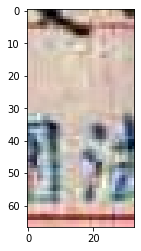

isnull
-----------------
/home/cai/PycharmProjects/esun_writing/img_contest/img1623753731.png
郁 自
[('自', 0.89757127), ('勳', 1.0743918), ('郁', 1.9157983)]


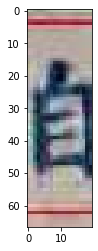

isnull
-----------------
/home/cai/PycharmProjects/esun_writing/img_contest/img1623843864.png
輝 輝
[('輝', 1.2605788), ('築', -0.09219626), ('戴', 0.46592507)]


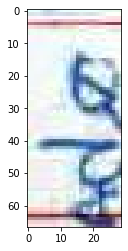

isnull
-----------------
/home/cai/PycharmProjects/esun_writing/img_contest/img1623925651.png
蘇 幸
[('幸', -1.3645449), ('泰', -1.662788), ('蘇', -0.9629717)]


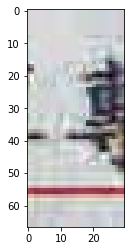

isnull
-----------------
/home/cai/PycharmProjects/esun_writing/img_contest/img1623838057.png
于 于
[('于', -0.25244245), ('翊', -1.9165647), ('森', -2.1827562)]


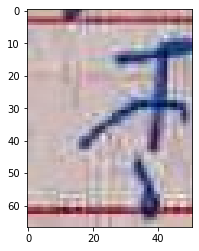

isnull
-----------------
/home/cai/PycharmProjects/esun_writing/img_contest/img1623755947.png
竹 北
[('北', 1.1007367), ('竹', 1.807487), ('坤', 0.8862891)]


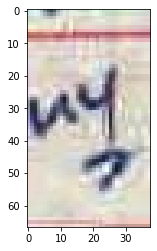

isnull
-----------------
/home/cai/PycharmProjects/esun_writing/img_contest/img1623932149.png
瑩 輝
[('輝', -1.1698322), ('煒', -0.547284), ('瑩', 1.6703572)]


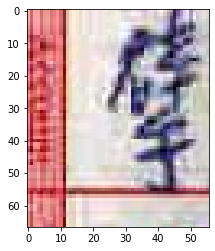

isnull
-----------------
/home/cai/PycharmProjects/esun_writing/img_contest/img1623758604.png
鴻 連
[('連', 0.81098175), ('源', 0.70102555), ('鴻', 1.0094821)]


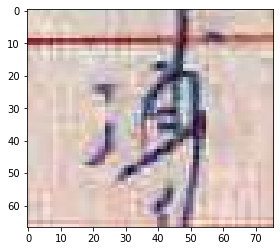

isnull
-----------------
/home/cai/PycharmProjects/esun_writing/img_contest/img1623930641.png
宋 蘇
[('蘇', 1.4556593), ('宋', 1.8680989), ('守', 1.0602854)]


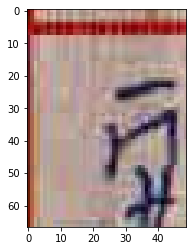

isnull
-----------------
/home/cai/PycharmProjects/esun_writing/img_contest/img1623932027.png
堯 念
[('念', -0.592942), ('太', 0.36398152), ('堯', 0.9064754)]


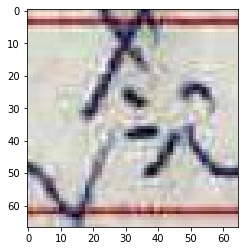

isnull
-----------------


In [60]:
from paddleocr import PaddleOCR, draw_ocr
import skimage.measure
ocr = PaddleOCR(rec_char_dict_path="/home/cai/Downloads/PaddleOCR/ppocr/utils/training_data_dic.txt") # need to run only once to download and load model into memory
from collections import Counter


    
def _FFT(img_original):
    ret3, th3 = cv2.threshold(img_original, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    dft = cv2.dft(np.float32(th3), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

    rows, cols = img_original.shape
    crow, ccol = rows // 2, cols // 2

    # create a mask first, center square is 1, remaining all zeros
    mask = np.zeros((rows, cols, 2), np.uint8)
    mask[crow - 15:crow + 15, ccol - 15:ccol + 15] = 1

    # apply mask and inverse DFT
    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    cv2.normalize(img_back, img_back, 0, 255, cv2.NORM_MINMAX)
    img_back = img_back.astype(np.uint8)

    return img_back


def blur(img_original):
    img_original = img_original.astype(np.uint8)
    img_blur = cv2.GaussianBlur(img_original, (3, 3), 0)
    ret3, th3 = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return th3
    

# PATH = "/home/cai/PycharmProjects/esun_writing/img0617"
# PATH = "/home/cai/PycharmProjects/esun_writing/N"
PATH = "/home/cai/PycharmProjects/esun_writing/img_contest/"
TRAIN_PATH = "/home/cai/PycharmProjects/esun_writing/correct_label_contest_0616/"
FAILED_PATH = "/home/cai/PycharmProjects/esun_writing/error/"
S2T_Label = ['采', '峰', '杰', '于', '里', '梁', '游', '范', '郁', '余', '松', '岳', '群','台']

dirs = os.listdir(PATH)
correct = 0
file_cnt = 0
for file in dirs:
# for _dir in dirs:
#     for file in os.listdir(os.path.join(PATH,_dir)):
    filePath = os.path.join(PATH,file)
#         filePath = os.path.join(PATH,_dir,file)
#         print(filePath)


    file_cnt += 1
    img_original = cv2.imread(filePath,0)
    result_arr = []

    # first
    result = ocr.ocr(os.path.join(PATH,file), det=False, cls=False)
    result_arr.append(list(result))

    #second
    ret3, th3 = cv2.threshold(img_original, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    result = ocr.ocr(th3, det=False, cls=False)
    result_arr.append(result)

    #third
    blur_img = blur(img_original)
    result = ocr.ocr(blur_img, det=False, cls=False)
    result_arr.append(result)

#     # forth
#     fft_img = _FFT(img_original)
#     result = ocr.ocr(fft_img, det=False, cls=False)
#     result_arr.append(result)

    result_arr = [item for subl in result_arr for item in subl]

#         print(result_arr)


    val_dict = {}
    dic_cnt = []
    val_ary = []
    max_val,max_tmp ="", -1000
    
    for result in result_arr:
        dic_cnt.append(result[0])
        val_ary.append(result[1])
        
        if result[1] > max_tmp:
            max_val = result[0] 
            max_tmp = result[1]
        if result[0] in val_dict:
            tmp = val_dict[result[0]]
            val_dict.update({result[0]:tmp + result[1]})
        else:
            val_dict.update({result[0]: result[1]})


    c = Counter(dic_cnt)
    max_cnt = c.most_common(1)[0][0]
#     max_val = max(val_dict, key=val_dict.get)
#     print(max_cnt, max_val)
    
    if len(max_cnt) > 1:
        max_cnt = max_cnt[0]
    if len(max_val) > 1:
        max_val = max_val[0]
    
    ret = ""
    
    if result_arr[0][0] == result_arr[2][0]:
        ret = result_arr[0][0]
        
    elif np.mean(val_ary) < 5 and len(val_dict)==3 and val_dict[max_val] < 2 :
        ret="isnull"
        print(filePath)
        print(max_val,max_cnt)
        print(result_arr)
        cv2_imshow(filePath)
        print(ret)
        print("-----------------")
        
    elif len(val_dict)==1:
        ret = max_cnt
        
    elif len(val_dict)==2:
        if (max_val==max_cnt):
            ret = max_val
        elif (max_val!=max_cnt) and (val_dict[max_cnt]/2>=2.5):
            ret = max_cnt
        elif max_val!=max_cnt and val_dict[max_val]>=2.5:
            ret = max_val
            
        else:
            ret="isnull"
        
    elif len(val_dict)==3 and val_dict[max_val] >=2 :
        ret = max_val
        
    else:
        ret="isnull"
        
        
    if ret=="N":
        ret="isnull"
        
        
        
        
#     if not ret ==testret:
#         print(filePath)
        
#         print(max_val,max_cnt)
#         print(result_arr)
#         cv2_imshow(filePath)
#         print(ret,testret)
#         print("-----------------")
        
        
   

        
#     if not ret == "":
#         if not os.path.exists(os.path.join(TRAIN_PATH,ret)):
#             os.mkdir(os.path.join(TRAIN_PATH,ret))
#         copyfile(filePath,os.path.join(TRAIN_PATH,ret,file))
#     else:
#         copyfile(filePath,os.path.join(FAILED_PATH,file))
    
    
        
#     elif len(val_dict)==3 and max_val in label_dict:
#         print("max_val",file)
#         ret = max_val
        
#     elif max_cnt in label_dict:
        
#         ret = max_cntcorrect_label
#     else:
#         copyfile(os.path.join(PATH,file),os.path.join(NULL_PATH,file))
#         ret = "isnull"
        
    if not os.path.exists(os.path.join(TRAIN_PATH,ret)):
        os.mkdir(os.path.join(TRAIN_PATH,ret))
    copyfile(os.path.join(PATH,file),os.path.join(TRAIN_PATH,ret,file))
        
        
    #######
        
#     if correct%100==0:
#         print(correct/file_cnt)
        
#     correct_label = file.split('_')[1][:-4]
    


#     if len(max_cnt) > 1:
#         max_cnt = max_cnt[0]
#     if len(max_val) > 1:
#         max_val = max_val[0]
    
#     if max_cnt in S2T_Label:
#         ret = max_cnt
#     elif max_val in S2T_Label:
#         ret = max_val
#     elif simply_to_tradition(max_cnt) in label_dict:
#         ret = simply_to_tradition(max_cnt)
#     elif simply_to_tradition(max_val) in label_dict:
#         ret = simply_to_tradition(max_val)
#     else:
#         ret="null"
        
    
        

#     if ret == correct_label:
# #         if not os.path.exists(os.path.join(TRAIN_PATH,ret)):
# #             os.mkdir(os.path.join(TRAIN_PATH,ret))
# #         copyfile(os.path.join(PATH,file),os.path.join(TRAIN_PATH,ret,file))
#         correct += 1
#     else: 
#         if not os.path.exists(os.path.join(FAILED_PATH,correct_label)):
#             os.mkdir(os.path.join(FAILED_PATH,correct_label))
#         copyfile(os.path.join(PATH,file),os.path.join(FAILED_PATH,correct_label,file))
    
        
    

In [58]:
print(correct)

26


In [53]:
PATH = "/home/cai/PycharmProjects/esun_writing/img0616"
DEL_PATH = "/home/cai/PycharmProjects/esun_writing/img_contest"
for file in os.listdir(DEL_PATH):
    if os.path.exists(os.path.join(PATH,file)):
        os.remove(os.path.join(PATH,file))

In [ ]:
## training

In [ ]:
import cv2
import os
import numpy as np
from keras.models import load_model, Model
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
import matplotlib.image as mpimg


In [ ]:
def get_model(layer='fc2'):
    """Keras Model of the VGG16 network, with the output layer set to `layer`.
    The default layer is the second-to-last fully connected layer 'fc2' of
    shape (4096,).
    Parameters
    ----------
    layer : str
        which layer to extract (must be of shape (None, X)), e.g. 'fc2', 'fc1'
        or 'flatten'
    """
    # base_model.summary():
    #     ....
    #     block5_conv4 (Conv2D)        (None, 15, 15, 512)       2359808
    #     _________________________________________________________________
    #     block5_pool (MaxPooling2D)   (None, 7, 7, 512)         0
    #     _________________________________________________________________
    #     flatten (Flatten)            (None, 25088)             0
    #     _________________________________________________________________
    #     fc1 (Dense)                  (None, 4096)              102764544
    #     _________________________________________________________________
    #     fc2 (Dense)                  (None, 4096)              16781312
    #     _________________________________________________________________
    #     predictions (Dense)          (None, 1000)              4097000
    #
    base_model = VGG16(weights='imagenet', include_top=True)
    model = Model(inputs=base_model.input,
                outputs=base_model.get_layer(layer).output)
    return model

def get_files(path_to_files, size):
    fn_imgs = []
    files = [file for file in os.listdir(path_to_files)]
    for file in files:
        img = cv2.resize(cv2.imread(path_to_files+file), size)
        
        fn_imgs.append([file, img])
    return dict(fn_imgs)


def feature_vector(img_arr, model):
    if img_arr.shape[2] == 1:
        img_arr = img_arr.repeat(3, axis=2)

    # (1, 224, 224, 3)
    arr4d = np.expand_dims(img_arr, axis=0)  
    arr4d_pp = preprocess_input(arr4d)
    return model.predict(arr4d_pp)[0,:]

def feature_vectors(imgs_dict, model):
    f_vect = {}
    for fn, img in imgs_dict.items():
        f_vect[fn] = feature_vector(img, model)
        print(f_vect)
    return f_vect


imgs_dict = get_files(path_to_files = '/home/cai/Pictures/error_100/',size = (224, 224))


# Create Keras NN model.
model = get_model()
print("get model")

# Feed images through the model and extract feature vectors.
img_feature_vector = feature_vectors(imgs_dict, model)


In [ ]:
images = list(img_feature_vector.values())
fns = list(img_feature_vector.keys())
sum_of_squared_distances = []
K = range(1, 30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(images)
    sum_of_squared_distances.append(km.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from ppocr.data import create_operators, transform
from ppocr.modeling.architectures import build_model
from ppocr.postprocess import build_post_process
from ppocr.utils.save_load import init_model
from ppocr.utils.utility import get_image_file_list
import tools.program as program

def main():

    model = build_model(config['Architecture'])

    init_model(config, model, logger)

    # create data ops
    transforms = []
    for op in config['Eval']['dataset']['transforms']:
        op_name = list(op)[0]
        if 'Label' in op_name:
            continue
        elif op_name in ['RecResizeImg']:
            op[op_name]['infer_mode'] = True
        elif op_name == 'KeepKeys':
            if config['Architecture']['algorithm'] == "SRN":
                op[op_name]['keep_keys'] = [
                    'image', 'encoder_word_pos', 'gsrm_word_pos',
                    'gsrm_slf_attn_bias1', 'gsrm_slf_attn_bias2'
                ]
            else:
                op[op_name]['keep_keys'] = ['image']
        transforms.append(op)
    global_config['infer_mode'] = True
    ops = create_operators(transforms, global_config)

    model.eval()
    for file in get_image_file_list(config['Global']['infer_img']):
        logger.info("infer_img: {}".format(file))
        with open(file, 'rb') as f:
            img = f.read()
            data = {'image': img}
        batch = transform(data, ops)
        if config['Architecture']['algorithm'] == "SRN":
            encoder_word_pos_list = np.expand_dims(batch[1], axis=0)
            gsrm_word_pos_list = np.expand_dims(batch[2], axis=0)
            gsrm_slf_attn_bias1_list = np.expand_dims(batch[3], axis=0)
            gsrm_slf_attn_bias2_list = np.expand_dims(batch[4], axis=0)

            others = [
                paddle.to_tensor(encoder_word_pos_list),
                paddle.to_tensor(gsrm_word_pos_list),
                paddle.to_tensor(gsrm_slf_attn_bias1_list),
                paddle.to_tensor(gsrm_slf_attn_bias2_list)
            ]

        images = np.expand_dims(batch[0], axis=0)
        images = paddle.to_tensor(images)
        if config['Architecture']['algorithm'] == "SRN":
            preds = model(images, others)
        else:
            preds = model(images)
        post_result = post_process_class(preds)
        for rec_reuslt in post_result:
            logger.info('\t result: {}'.format(rec_reuslt))
    logger.info("success!")